<a href="https://colab.research.google.com/github/yeasintaha/Bangla-Voice-Text-Summarization/blob/main/Final_Bangla_Voice_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Bangla_text_summarizer/bangla_summarize.zip"

Archive:  /content/drive/My Drive/Bangla_text_summarizer/bangla_summarize.zip
  inflating: Bengali-News-Summarization-Dataset/article.txt  
  inflating: Bengali-News-Summarization-Dataset/summary.txt  


In [ ]:
!unzip "/content/drive/My Drive/Bangla_text_summarizer/news_summarization.zip"

Archive:  /content/drive/My Drive/Bangla_text_summarizer/news_summarization.zip
  inflating: BusinessNewsData.csv    
  inflating: EntertainmentNewsData.csv  
  inflating: OpinionNewsData.csv     
  inflating: PoliticsNewsData.csv    
  inflating: SportsNewsData.csv      
  inflating: WorldsNewsData.csv      
  inflating: bangladeshnewsData.csv  


In [ ]:
!unzip "/content/drive/My Drive/Bangla_text_summarizer/text_summarization.csv.zip"


Archive:  /content/drive/My Drive/Bangla_text_summarizer/text_summarization.csv.zip
  inflating: text_summarization.csv  


In [ ]:
df_article = pd.read_csv("Bengali-News-Summarization-Dataset/article.txt", sep="\n", header=None)
df_article.columns = ['article']

df_summary = pd.read_csv("Bengali-News-Summarization-Dataset/summary.txt", sep="\n", header=None)
df_summary.columns = ['Summary']

df = pd.concat([df_article, df_summary], axis=1)
df.rename(columns = {'article' : "Description"}, inplace = True)
df.head()

,Description,Summary
0,স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...,স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আবরার
1,রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...,মার্চের মধ্যে সাভারে চামড়া শিল্পের সিইটিপি: মন...
2,দেশীয় শিল্প বিকাশে সরকারের সব ধরনের উদ্যোগ অব্...,ওয়ালটন কারখানায় শিল্পমন্ত্রী
3,একীভূত হতে চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন স...,একীভূত হচ্ছে এখানেই ডটকমওএলএক্স
4,যাত্রীবাহী একটি বাসে আগুন দেওয়ার আধা ঘণ্টার মধ...,বাসে আগুন: নড়াইলের পৌর মেয়র গ্রেপ্তার


In [ ]:
df1= pd.read_csv("text_summarization.csv")
df1.drop(['category'], axis=1, inplace=True)
df1.rename(columns = {'summary' : 'Summary', 'text' : 'Description'}, inplace = True)
df1.head()

,Summary,Description
0,অ্যাপসে মিলবে ঢাকাসহ তিন জেলা আদালতের তথ্য,"ঢাকা মহানগর ও ঢাকা জেলা আদালত, কিশোরগঞ্জ ও রাঙ..."
1,বিজ্ঞান ও প্রকৌশলে মার্কিন সর্বোচ্চ সম্মাননা...,যুক্তরাষ্ট্রে বিজ্ঞান ও প্রকৌশলে পেশা শুরুর প...
2,বিকল্প শিশুখাদ্য গ্রহণে শিশুর মৃত্যু হলে শাস্ত...,বিকল্প শিশুখাদ্য ও বাণিজ্যিকভাবে উত্পাদিত শিশু...
3,ট্রেনে কাটা পড়ে সাবেক সিভিল সার্জনের মৃত্যু,বগুড়ার আদমদীঘির সান্তাহারে গতকাল শনিবার ট্রেন...
4,যাত্রাবাড়ীতে চুলা জ্বালাতে গিয়ে দুই কর্মচারী ...,যাত্রাবাড়ীর একটি রেস্তোরাঁয় গতকাল বুধবার ভোর...


In [ ]:
# shift column 'Name' to first position
df_description = df1.pop('Description')
df1.insert(0, 'Description', df_description)
df1.head()

,Description,Summary
0,"ঢাকা মহানগর ও ঢাকা জেলা আদালত, কিশোরগঞ্জ ও রাঙ...",অ্যাপসে মিলবে ঢাকাসহ তিন জেলা আদালতের তথ্য
1,যুক্তরাষ্ট্রে বিজ্ঞান ও প্রকৌশলে পেশা শুরুর প...,বিজ্ঞান ও প্রকৌশলে মার্কিন সর্বোচ্চ সম্মাননা...
2,বিকল্প শিশুখাদ্য ও বাণিজ্যিকভাবে উত্পাদিত শিশু...,বিকল্প শিশুখাদ্য গ্রহণে শিশুর মৃত্যু হলে শাস্ত...
3,বগুড়ার আদমদীঘির সান্তাহারে গতকাল শনিবার ট্রেন...,ট্রেনে কাটা পড়ে সাবেক সিভিল সার্জনের মৃত্যু
4,যাত্রাবাড়ীর একটি রেস্তোরাঁয় গতকাল বুধবার ভোর...,যাত্রাবাড়ীতে চুলা জ্বালাতে গিয়ে দুই কর্মচারী ...


In [ ]:
df2 = pd.read_csv("BusinessNewsData.csv")
df2.drop(['Title', 'Meta-Summary', 'syndicate-catagorys', 'Keywords-for-related-articles'], axis=1, inplace=True)
df2.head()

,Description,Summary
0,ই–অরেঞ্জের মালিকপক্ষ যেন বাণিজ্য মন্ত্রণালয়ের ...,ভুক্তভোগী গ্রাহকদের পক্ষে চারজন আজ বুধবার সচিব...
1,সিমেন্ট তৈরির প্রধান কাঁচামাল ক্লিংকার রপ্তানি...,ভিয়েতনামের শুল্ক বাড়ানো হলে ক্লিংকারের দর আরেক...
2,সূচক ও লেনদেন কমেছে দেশের শেয়ারবাজারে। আজ বুধব...,সূচক ও লেনদেন কমেছে দেশের শেয়ারবাজারে। আজ বুধব...
3,বাংলাদেশ কৃষি ব্যাংকের উপব্যবস্থাপনা পরিচালক শ...,বাংলাদেশ কৃষি ব্যাংকের উপব্যবস্থাপনা পরিচালক শ...
4,"মালা শাড়ি, বাংলাদেশের শাড়ির জগতে প্রথম সুপরিচি...",দেশের অন্যতম বৃহৎ শিল্পগোষ্ঠী আনোয়ার গ্রুপের চ...


In [ ]:
df3 = pd.read_csv("EntertainmentNewsData.csv")
df3.drop(['Title', 'Meta-Summary', 'syndicate-catagorys', 'Keywords-for-related-articles'], axis=1, inplace=True)
df3.head()

,Description,Summary
0,মহামারিতে সবার মতো ঘরবন্দী ছিলেন শিল্পী তানভীর...,কার সঙ্গে আড্ডা দিতে বেশি ভালো লাগল? সজীব বলেন...
1,"ঢের হয়েছে পর্দায় নাচাগানা, নায়কের সঙ্গে রোমান্...","ঢের হয়েছে পর্দায় নাচাগানা, নায়কের সঙ্গে রোমান্..."
2,অভিনেত্রী ইয়ামিন হক ববির আজ জন্মদিন। কত বছরে প...,এই দিনে প্রেমের প্রস্তাব আমার কাছে অদ্ভুত মনে ...
3,বলিউডের প্রভাবশালী অভিনেত্রী রাধিকা আপ্তে। ‘পা...,২০১৫ সালে মুক্তি পাওয়া পার্চড ছবিতে রাধিকার সহ...
4,স্বাধীনতা–উত্তর বাংলাদেশের অন্যতম জনপ্রিয় অভিন...,হঠাৎ ঘুম ভেঙে উঠে একবার ফারুক দেখেন সামনে এক ত...


In [ ]:
df4 = pd.read_csv("OpinionNewsData.csv")
df4.drop(['Title', 'Meta-Summary', 'syndicate-catagorys', 'Keywords-for-related-articles'], axis=1, inplace=True)
df4.head()

,Description,Summary
0,আফগানিস্তানে গত কয়েক দিনে দফায় দফায় ঝোড়ো গতির ...,তালেবানের নাটকীয় অগ্রগতি এবং আফগানিস্তানের সাং...
1,আগুনে পুড়ে খাক না হওয়া পর্যন্ত শিশু আর শ্রমিকদ...,"দিনাজপুরের ফয়জুল ইসলামের ছেলে সাজ্জাদ হোসেন, গ..."
2,মহামারিকালে বিধিনিষেধের সময় পুরুষদের ঘরের কাজে...,মহামারিকালে বিধিনিষেধের সময় পুরুষদের ঘরের কাজে...
3,প্রথম আলো: কথা ছিল ৫ আগস্ট পর্যন্ত কঠোর বিধিনি...,ড. সৈয়দ আব্দুল হামিদ ঢাকা বিশ্ববিদ্যালয়ের স্বা...
4,হেপাটাইটিস অনেক কারণেই হয়ে থাকে। স্বল্পকালীন ...,হেপাটাইটিস অনেক কারণেই হয়ে থাকে। স্বল্পকালীন ...


In [ ]:
df5 = pd.read_csv("PoliticsNewsData.csv")
df5.drop(['Title', 'Meta-Summary', 'syndicate-catagorys', 'Keywords-for-related-articles'], axis=1, inplace=True)
df5.head()

,Description,Summary
0,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...
1,"তথ্যমন্ত্রী হাছান মাহমুদ বলেছেন, জনগণের পাশে ন...","তথ্যমন্ত্রী হাছান মাহমুদ বলেছেন, জনগণের পাশে ন..."
2,বিএনপির চেয়ারপারসন ও সাবেক প্রধানমন্ত্রী খালেদ...,বিএনপির চেয়ারপারসন ও সাবেক প্রধানমন্ত্রী খালেদ...
3,রাজধানীর চন্দ্রিমা উদ্যানে বিএনপির নেতা-কর্মীদ...,পুলিশের তেজগাঁও বিভাগের উপকমিশনার (ডিসি) মো. শ...
4,বিএনপির চেয়ারপারসন ও সাবেক প্রধানমন্ত্রী খালেদ...,বিএনপির চেয়ারপারসন ও সাবেক প্রধানমন্ত্রী খালেদ...


In [ ]:
df6 = pd.read_csv("SportsNewsData.csv")
df6.drop(['Title', 'Meta-Summary', 'syndicate-catagorys', 'Keywords-for-related-articles'], axis=1, inplace=True)
df6.head()

,Description,Summary
0,ইংল্যান্ড টেস্ট দলে ব্যাটসম্যানের সংকট নতুন নয়...,দুই ওপেনারের টানা ব্যর্থতায় ব্যাটিং অর্ডারের এ...
1,চেলসি চ্যাম্পিয়নস লিগ জিতল। অনেকের কণ্ঠেই আওয়া...,কোপা আমেরিকা জিতে মেসি ঘুচিয়েছেন আর্জেন্টিনার ...
2,কেপটাউনে বল টেম্পারিং কেলেঙ্কারির পর অস্ট্রেলি...,"ড্রেসিংরুমে ল্যাঙ্গারের ভিন্ন রূপ, তাঁর খেলোয়া..."
3,আফগানিস্তানের ক্ষমতা চলে গেছে তালেবানদের হাতে।...,আফগানিস্তানের ক্ষমতা চলে গেছে তালেবানদের হাতে।...
4,লিওনেল মেসি পিএসজিতে নাম লিখিয়েছেন। বার্সেলোনা...,জুলাইয়ে আর্জেন্টিনাকে কোপা আমেরিকা জেতানোর পথে...


In [ ]:
df7 = pd.read_csv("WorldsNewsData.csv")
df7.drop(['Title', 'Meta-Summary', 'syndicate-catagorys', 'Keywords-for-related-articles'], axis=1, inplace=True)
df7.head()

,Description,Summary
0,আফগানিস্তানের রাজধানী কাবুলের পূর্ব দিকে অন্যত...,আফগানিস্তানের রাজধানী কাবুলের পূর্ব দিকে অন্যত...
1,তালেবান এর আগে বিভিন্ন সময় বিভিন্নভাবে আলোচনায়...,সোভিয়েত ও মুজাহিদিনদের লড়াইয়ে যুক্তরাষ্ট্রের ভ...
2,একের পর এক প্রদেশ দখল করে তালেবান রাজধানী কাব...,আয়েশা আহমাদ কাবুল বিশ্ববিদ্যালয়ের ছাত্রী। তালে...
3,"উড়োজাহাজের মেঝেতে গাদাগাদি করে বসা, কারও মাথায়...","উড়োজাহাজের মেঝেতে গাদাগাদি করে বসা, কারও মাথায়..."
4,নিউজিল্যান্ডে ছয় মাস পর আবার হানা দিয়েছে করোন...,করোনা সংক্রমণ রোধে সফল দেশগুলোর তালিকার ওপরের...


In [ ]:
df8 = pd.read_csv("bangladeshnewsData.csv")
df8.drop(['Title', 'Meta-Summary', 'syndicate-catagorys', 'Keywords-for-related-articles'], axis=1, inplace=True)
df8.head()

,Description,Summary
0,গাজীপুরে ছেলে ‘হত্যা’র বিচার চাইতে গিয়ে প্রতিপ...,সালিস বৈঠককে কেন্দ্র করে আসাদুল ইসলামকে স্থানী...
1,কুষ্টিয়া সদর উপজেলায় শেখ রাসেল কুষ্টিয়া-হরিপুর...,বুধবার সন্ধ্যার পর থেকে দেড় ঘণ্টায় বাঁধের অন্ত...
2,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...
3,কিশোরগঞ্জের পাকুন্দিয়ায় ব্রহ্মপুত্র নদে নৌকাডু...,নিহত মোবারক হোসেন উপজেলার চরফরাদী ইউনিয়নের চরপ...
4,বঙ্গবন্ধু শেখ মুজিবুর রহমানকে কাছে থেকে দেখেছে...,বঙ্গবন্ধু শেখ মুজিবুর রহমানকে কাছে থেকে দেখেছে...


In [ ]:
df_combined = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8], axis=0)
df_combined.head()

,Description,Summary
0,স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...,স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আবরার
1,রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...,মার্চের মধ্যে সাভারে চামড়া শিল্পের সিইটিপি: মন...
2,দেশীয় শিল্প বিকাশে সরকারের সব ধরনের উদ্যোগ অব্...,ওয়ালটন কারখানায় শিল্পমন্ত্রী
3,একীভূত হতে চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন স...,একীভূত হচ্ছে এখানেই ডটকমওএলএক্স
4,যাত্রীবাহী একটি বাসে আগুন দেওয়ার আধা ঘণ্টার মধ...,বাসে আগুন: নড়াইলের পৌর মেয়র গ্রেপ্তার


In [ ]:
df_combined.shape

(122858, 2)

In [ ]:
index = []
for i, val in enumerate(np.array(df_combined['Description'].isna())) :
  if val==True:
    index.append(i)
df_combined['Description'][index[0]]

11926                                                  NaN
11926    চট্টগ্রামে বিমা কর্মকর্তাকে গ্রেপ্তারের ভয় দেখ...
Name: Description, dtype: object

In [ ]:
df_combined = (df_combined.reset_index()
        .drop_duplicates(subset='index', keep='last')
        .set_index('index').sort_index())
df_combined.head()

,Description,Summary
index,,
0,গাজীপুরে ছেলে ‘হত্যা’র বিচার চাইতে গিয়ে প্রতিপ...,সালিস বৈঠককে কেন্দ্র করে আসাদুল ইসলামকে স্থানী...
1,কুষ্টিয়া সদর উপজেলায় শেখ রাসেল কুষ্টিয়া-হরিপুর...,বুধবার সন্ধ্যার পর থেকে দেড় ঘণ্টায় বাঁধের অন্ত...
2,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...
3,কিশোরগঞ্জের পাকুন্দিয়ায় ব্রহ্মপুত্র নদে নৌকাডু...,নিহত মোবারক হোসেন উপজেলার চরফরাদী ইউনিয়নের চরপ...
4,বঙ্গবন্ধু শেখ মুজিবুর রহমানকে কাছে থেকে দেখেছে...,বঙ্গবন্ধু শেখ মুজিবুর রহমানকে কাছে থেকে দেখেছে...


In [ ]:
df_combined = (df_combined.reset_index()
        .drop_duplicates(subset='index', keep='last')
        .set_index('index').sort_index())
df_combined.head()

,Description,Summary
index,,
0,গাজীপুরে ছেলে ‘হত্যা’র বিচার চাইতে গিয়ে প্রতিপ...,সালিস বৈঠককে কেন্দ্র করে আসাদুল ইসলামকে স্থানী...
1,কুষ্টিয়া সদর উপজেলায় শেখ রাসেল কুষ্টিয়া-হরিপুর...,বুধবার সন্ধ্যার পর থেকে দেড় ঘণ্টায় বাঁধের অন্ত...
2,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...
3,কিশোরগঞ্জের পাকুন্দিয়ায় ব্রহ্মপুত্র নদে নৌকাডু...,নিহত মোবারক হোসেন উপজেলার চরফরাদী ইউনিয়নের চরপ...
4,বঙ্গবন্ধু শেখ মুজিবুর রহমানকে কাছে থেকে দেখেছে...,বঙ্গবন্ধু শেখ মুজিবুর রহমানকে কাছে থেকে দেখেছে...


In [ ]:
df_combined.dropna(inplace=True)

In [ ]:
df_combined.isna().sum()

Description    0
Summary        0
dtype: int64

In [ ]:
index_summary = []
for i, val in enumerate(df_combined['Summary']):
  if len(val) < 18:
    index_summary.append(i)

for i in index_summary:
  print(df_combined['Summary'][i])


বা ং লা ১ ম প ত্র
বা ং লা ১ ম প ত্র
উ চ্চ ত র গ ণি ত
বা ং লা ১ ম প ত্র
বা ং লা ১ ম প ত্র
বা ং লা ২ য় প ত্র
উ চ্চ ত র গ ণি ত
বা ং লা ১ ম প ত্র
উ চ্চ ত র গ ণি ত
শহরের বাতাস দূষিত, নিশ্বাস নেওয়া যায় না
চিংড়ি রেণুসহ দুটি ট্রলার জব্দ আটক ১১
বাল্যবিবাহ থেকে রক্ষা পেল নবম শ্রেণির ছাত্রী
গফরগাঁওয়ে মেডোনা গ্রুপের ৩০ লাখ টাকার অনুদান
দলের মধ্যে অসুস্থ প্রতিযোগিতা সহ্য করা হবে না: কাদের
মন্ত্রীর প্রার্থী ও বিএনপির বিদ্রোহী প্রার্থীর লড়াই
বছরে রিয়ালের আয় ৫ হাজার কোটি টাকা!
বিদ্যুৎ ও গ্যাসের মূল্যবৃদ্ধির প্রতিবাদ কর্মসূচিতে পুলিশের বাধা
শাকিব খানের অনুরোধ ফেলতে পারলেন না সম্রাট
আ.লীগের প্রার্থী পরিবর্তনের ধাক্কা বিজয় দিবসের সজ্জায়ও
মিয়ানমারের কাছে ২৭ জুলাইয়ের মধ্যে পর্যবেক্ষণ চায় আইসিসি
দুই বন্ধু পৌঁছালেন ইতালি, অন্য দুজন নিখোঁজ
ব্রাজিলের ১০ কিশোর ফুটবলারের নাম জানা গেল
কোনো ফাঁদে পা দেব না: মির্জা ফখরুল
ছয় জেলার শীতার্তরা পেলেন কম্বল ও চাদর
আইএফআইসি সাহিত্য পুরস্কার পেলেন ফারুক চৌধুরী ও শাহিন আখতার
একজনের কমিটি দিয়ে মেয়াদের ১৪ মাস পার
কলকাতায় সৈয়দ হকের ‘বুকঝিম এক ভালোবাসা’র নাট্যায়ন
নেতা–কর্মীর

In [ ]:
len(index_summary)

58

In [ ]:
df_combined.drop(index_summary, axis=0, inplace=True)

In [ ]:
df_combined.shape

(80265, 2)

In [ ]:
def remove_stopword(text):
    stopwords = pd.read_csv("/content/drive/My Drive/IDP/Dataset/bangla_stopwords.csv")
    stopwords = stopwords.to_numpy()
    stopwords = [s for stop in stopwords for s in stop]
    text = np.char.split(text, sep= ' ')
    text = text.reshape(-1)
    index = []
    for t in text:
        for i in range(len(t)):

            if t[i]=='':
                index.append(i)
    for t in text:
        t = np.delete(t, index)
        text = t

    for t in text:
        for stop in stopwords:
            if t == stop and len(t)== len(stop):
                text = np.char.replace(text, stop, '')
    index = []
    for i in range(len(text)):
        if text[i]=='':
            index.append(i)

    text = np.delete(text, index)

    return text


def stemmer(word_list):
    stemmed_word=[]
    end_char = ['ই', 'ও', 'তো', 'কে', 'তে', 'রা','চ্ছি','চ্ছিল','চ্ছে','চ্ছিস','চ্ছিলেন','চ্ছ','য়েছে','েছ','েছে','েছেন']

    for word in word_list:
        br=0
        for stem in end_char:
            ch = word.split(stem)
            if len(ch)==2:
                if len(ch[1])==0:
                    stemmed_word.append(ch[0])
                    br=1
                    break
        if br==0:
            stemmed_word.append(word)

    return ' '.join(stemmed_word)

In [ ]:
# df['Summary'] = df['Summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [ ]:
trainX = np.array(df_combined.Description)
trainY = np.array(df_combined.Summary)

In [ ]:
import re
trainX = [re.sub("[a-zA-z0-9,@,;.।\|?:\"$%&#''\-\!\^*(){}\[\]<>—’“”√।\-=+/]+","", str(x)).strip() for x in trainX]
emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        u"\u200b"
        u"\u200c"
                      "]+", re.UNICODE)

trainX = [re.sub(emoji,'',x).strip() for x in trainX]

In [ ]:
trainY = [re.sub("[a-zA-z0-9,@,;.।\|?:\"$%&#''\-\!\^*(){}\[\]<>—’“”√।\-=+/]+","", str(x)).strip() for x in trainY]
emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        u"\u200b"
        u"\u200c"
                      "]+", re.UNICODE)

trainY = [re.sub(emoji,'',x).strip() for x in trainY]

In [ ]:
from tqdm import tqdm
corpus = list()

for t in tqdm(trainX):
    # processed_text = remove_stopword(t)
    processed_text = stemmer(t.split(' '))
    corpus.append(processed_text)

100%|██████████| 80265/80265 [01:01<00:00, 1296.07it/s]


In [ ]:
preprocessed = pd.DataFrame()
preprocessed['cleaned_text'] = pd.Series(corpus)
preprocessed['cleaned_summary'] = pd.Series(trainY)
preprocessed.head()

,cleaned_text,cleaned_summary
0,গাজীপুরে ছেলে ‘হত্যার বিচার চাই গিয়ে প্রতিপক্ষ...,সালিস বৈঠককে কেন্দ্র করে আসাদুল ইসলামকে স্থানী...
1,কুষ্টিয়া সদর উপজেলায় শেখ রাসেল কুষ্টিয়াহরিপুর ...,বুধবার সন্ধ্যার পর থেকে দেড় ঘণ্টায় বাঁধের অন্ত...
2,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বল আ...,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...
3,কিশোরগঞ্জের পাকুন্দিয়ায় ব্রহ্মপুত্র নদে নৌকাডু...,নিহত মোবারক হোসেন উপজেলার চরফরাদী ইউনিয়নের চরপ...
4,বঙ্গবন্ধু শেখ মুজিবুর রহমান কাছে থে দেখ তাঁ সব...,বঙ্গবন্ধু শেখ মুজিবুর রহমানকে কাছে থেকে দেখেছে...


In [ ]:
text_count = []
summary_count = []

for sent in preprocessed['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in preprocessed['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count
graph_df.head()

,text,summary
0,300,21
1,341,31
2,500,29
3,169,20
4,1529,40


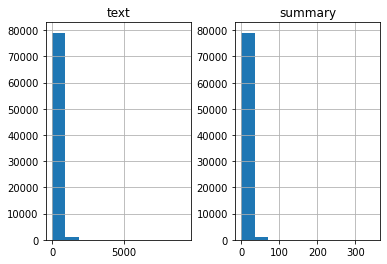

In [ ]:
graph_df.hist()
plt.show()

In [ ]:
max_text_len = 500
max_summary_len = 70

In [ ]:
cleaned_text =np.array(preprocessed['cleaned_text'])
cleaned_summary=np.array(preprocessed['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})
post_pre.head()

,text,summary
0,গাজীপুরে ছেলে ‘হত্যার বিচার চাই গিয়ে প্রতিপক্ষ...,সালিস বৈঠককে কেন্দ্র করে আসাদুল ইসলামকে স্থানী...
1,কুষ্টিয়া সদর উপজেলায় শেখ রাসেল কুষ্টিয়াহরিপুর ...,বুধবার সন্ধ্যার পর থেকে দেড় ঘণ্টায় বাঁধের অন্ত...
2,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বল আ...,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...
3,কিশোরগঞ্জের পাকুন্দিয়ায় ব্রহ্মপুত্র নদে নৌকাডু...,নিহত মোবারক হোসেন উপজেলার চরফরাদী ইউনিয়নের চরপ...
4,সন্তানের ম বড় করছিলেন ৩০টি বিদেশি জাতের ভেড়া হ...,প্রাণিসম্পদ অধিদপ্তরের ভাষ্য কৃমির জন্য যথাযথ ...


In [ ]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'ankara '+ x + ' bibh')
post_pre.head()

,text,summary
0,গাজীপুরে ছেলে ‘হত্যার বিচার চাই গিয়ে প্রতিপক্ষ...,ankara সালিস বৈঠককে কেন্দ্র করে আসাদুল ইসলামকে...
1,কুষ্টিয়া সদর উপজেলায় শেখ রাসেল কুষ্টিয়াহরিপুর ...,ankara বুধবার সন্ধ্যার পর থেকে দেড় ঘণ্টায় বাঁধ...
2,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বল আ...,ankara বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগ...
3,কিশোরগঞ্জের পাকুন্দিয়ায় ব্রহ্মপুত্র নদে নৌকাডু...,ankara নিহত মোবারক হোসেন উপজেলার চরফরাদী ইউনিয়...
4,সন্তানের ম বড় করছিলেন ৩০টি বিদেশি জাতের ভেড়া হ...,ankara প্রাণিসম্পদ অধিদপ্তরের ভাষ্য কৃমির জন্য...


In [ ]:
for i in range(3):
    print(post_pre['text'][i], '\n')
    print(post_pre['summary'][i], '\n\n')

গাজীপুরে ছেলে ‘হত্যার বিচার চাই গিয়ে প্রতিপক্ষের মারধরে পোশাকশ্রমিক বাবার মৃত্যু হ বলে অভিযোগ পাওয়া গ আজ বুধবার দুপুরে গাজীপুর সিটি করপোরেশনের বাহাদুরপর এলাকায় এ ঘটনা ঘটে নিহত ব্যক্তির নাম আসাদুল ইসলাম ৫২ তিনি গাইবান্ধার গোবিন্দগঞ্জ উপজেলার পাঁচউলিপুর এলাকার মৃত গোলাম উদ্দিনের ছেলেনিহতের পরিবার  পুলিশ সূত্র জানায় আসাদুল ইসলাম গাজীপুর সিটি করপোরেশনের বাহাদুরপুর তুলসীভিটা এলাকার ফিরোজের বাড়ি সপরিবার ভাড়া থাকেন সেখান থে স্থানীয় একটি পোশাক তৈরি কারখানায় চাকরি করতেন ৩ আগস্ট বেলা ১১টার দি তাঁর ছেলে মো নয়ন মিয়া ১২ তুরাগ নদে মাছ ধরার কথা বলে বাড়ি থে ডে আঙ্গুটিয়াচালা এলাকায় নিয়ে যান প্রতিবেশী সেজু ২৫ আনন্দ ২১ বাবলু মিয়া ৪২ শাহীন হোসেনসহ ১৯ কয়েকজন সেখানে নৌকা থে নদে পড়ে নিখোঁজ হয় নয়ন পরে সন্ধ্যায় তার লাশ ও নদ থে উদ্ধার করেন স্থানীয় ব্যক্তিরাএ ঘটনায় নৌকা থে নদে ফেলে দিয়ে নয়ন হত্যা ক হ বলে দাবি করেন আসাদুল ইসলাম বিষয়টি নিয়ে এলাকায় আসাদুলের ঘনিষ্ঠ সুজন মাহমুদ  অভিযুক্তদের আত্মীয় আলমগীর হোসেনের সমর্থকদের মধ্যে বিরোধ সৃষ্টি হয় এ নিয়ে গত সোমবার বিকেলে সালিস ডাকা হয় প্রতিপক্ষের লোকজন উপস্থিত না থাকায় ব

In [ ]:
post_pre.shape

(72770, 2)

In [ ]:
def sample_description(dataset,return_len=False):
    sample_lengths = [len(sample) for sample in dataset]
    print(f"Total Samples: {len(sample_lengths)}, Max Length: {max(sample_lengths)}, Min Length: {min(sample_lengths)}")
    #
    plt.figure(figsize=(5,5))
    plt.hist(sample_lengths,bins=int(np.sqrt(len(sample_lengths))))
    plt.title('Sample Lengths Distribution')

    #return sample lengths
    if return_len:
        return sample_lengths

In [ ]:
remove_index = []
for i, val in enumerate(post_pre['text']):
  if len(val)== 0 :
    remove_index.append(i)
len(remove_index)

0

In [ ]:
post_pre.drop(remove_index, axis=0, inplace=True)

In [ ]:
remove_index = []
for i, val in enumerate(post_pre['text']):
  if len(val)== 0 :
    remove_index.append(i)
len(remove_index)

0

Total Samples: 72770, Max Length: 5221, Min Length: 8


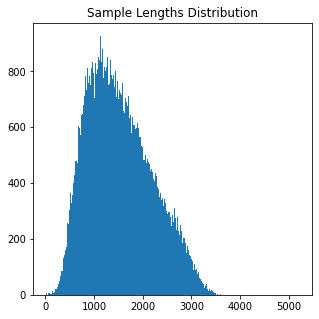

In [ ]:
sample_description(post_pre['text'])

Total Samples: 72770, Max Length: 472, Min Length: 12


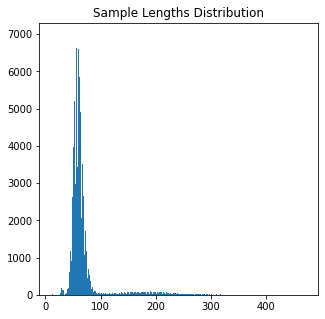

In [ ]:
sample_description(post_pre['summary'])

In [ ]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len= 500
max_summary_len= 20

In [ ]:
for i in range(5):
    print("Review:",post_pre['text'][i])
    print("Summary:",post_pre['summary'][i])
    print("\n")

Review: গাজীপুরে ছেলে ‘হত্যার বিচার চাই গিয়ে প্রতিপক্ষের মারধরে পোশাকশ্রমিক বাবার মৃত্যু হ বলে অভিযোগ পাওয়া গ আজ বুধবার দুপুরে গাজীপুর সিটি করপোরেশনের বাহাদুরপর এলাকায় এ ঘটনা ঘটে নিহত ব্যক্তির নাম আসাদুল ইসলাম ৫২ তিনি গাইবান্ধার গোবিন্দগঞ্জ উপজেলার পাঁচউলিপুর এলাকার মৃত গোলাম উদ্দিনের ছেলেনিহতের পরিবার  পুলিশ সূত্র জানায় আসাদুল ইসলাম গাজীপুর সিটি করপোরেশনের বাহাদুরপুর তুলসীভিটা এলাকার ফিরোজের বাড়ি সপরিবার ভাড়া থাকেন সেখান থে স্থানীয় একটি পোশাক তৈরি কারখানায় চাকরি করতেন ৩ আগস্ট বেলা ১১টার দি তাঁর ছেলে মো নয়ন মিয়া ১২ তুরাগ নদে মাছ ধরার কথা বলে বাড়ি থে ডে আঙ্গুটিয়াচালা এলাকায় নিয়ে যান প্রতিবেশী সেজু ২৫ আনন্দ ২১ বাবলু মিয়া ৪২ শাহীন হোসেনসহ ১৯ কয়েকজন সেখানে নৌকা থে নদে পড়ে নিখোঁজ হয় নয়ন পরে সন্ধ্যায় তার লাশ ও নদ থে উদ্ধার করেন স্থানীয় ব্যক্তিরাএ ঘটনায় নৌকা থে নদে ফেলে দিয়ে নয়ন হত্যা ক হ বলে দাবি করেন আসাদুল ইসলাম বিষয়টি নিয়ে এলাকায় আসাদুলের ঘনিষ্ঠ সুজন মাহমুদ  অভিযুক্তদের আত্মীয় আলমগীর হোসেনের সমর্থকদের মধ্যে বিরোধ সৃষ্টি হয় এ নিয়ে গত সোমবার বিকেলে সালিস ডাকা হয় প্রতিপক্ষের লোকজন উপস্থিত না

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(np.array(post_pre['text']), np.array(post_pre['summary']), test_size=0.1, random_state=8, shuffle=True)

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Embedding, LSTM, CuDNNLSTM, Concatenate, TimeDistributed, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(X_train))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 79.64331864201775
Total Coverage of rare words: 2.967625538074512


In [ ]:
len(x_tokenizer.index_word)

459682

In [ ]:
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(X_train))

x_tr_seq    =   x_tokenizer.texts_to_sequences(X_train)
x_val_seq   =   x_tokenizer.texts_to_sequences(X_val)

x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 93577


In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 78.94640234948605
Total Coverage of rare words: 9.051904430825102


In [ ]:
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_train))

y_tr_seq    =   y_tokenizer.texts_to_sequences(y_train)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val)

y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 10324


In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
x_tr.shape

(65466, 500)

In [ ]:
y_tr.shape

(65466, 20)

In [ ]:
x_val.shape

(7271, 500)

In [ ]:
y_val.shape

(7271, 20)

In [ ]:
latent_dim = 300
embedding_dim = 200

In [ ]:
# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = CuDNNLSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = CuDNNLSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3= CuDNNLSTM(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)


# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = CuDNNLSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_33 (InputLayer)          [(None, 500)]        0           []                               
                                                                                                  
 embedding_32 (Embedding)       (None, 500, 200)     18715400    ['input_33[0][0]']               
                                                                                                  
 cu_dnnlstm_4 (CuDNNLSTM)       [(None, 500, 300),   602400      ['embedding_32[0][0]']           
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                            

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy')

In [ ]:
history=model.fit([x_tr, y_tr[:,:-1]],
                  y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:],
                  epochs=5,
                  batch_size=64,
                  validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/5
1023/1023 [==============================] - 220s 215ms/step - loss: 3.0770 - val_loss: 2.8797
Epoch 2/5
1023/1023 [==============================] - 217s 212ms/step - loss: 2.8177 - val_loss: 2.7030
Epoch 3/5
1023/1023 [==============================] - 216s 211ms/step - loss: 2.6709 - val_loss: 2.6183
Epoch 4/5
1023/1023 [==============================] - 216s 211ms/step - loss: 2.5847 - val_loss: 2.5717
Epoch 5/5
1023/1023 [==============================] - 216s 211ms/step - loss: 2.5232 - val_loss: 2.5415


#### GRU MODEL

In [ ]:
from keras.layers import GRU

In [ ]:
# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder gru 1
encoder_gru1 = GRU(latent_dim,return_sequences=True,return_state=True)
encoder_output1, state_h1= encoder_gru1(enc_emb)

#encoder gru 2
encoder_gru2 = GRU(latent_dim,return_sequences=True,return_state=True)
encoder_output2, state_h2= encoder_gru2(encoder_output1)

#encoder gru 3
encoder_gru3= GRU(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h= encoder_gru3(encoder_output2)


# Set up the decoder, using  encoder_states  as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_gru = GRU(latent_dim, return_sequences=True, return_state=True)
decoder_outputs,decoder_fwd_state = decoder_gru(dec_emb)

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model_gru = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model_gru.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_32 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 embedding_31 (Embedding)       (None, None, 200)    2064800     ['input_32[0][0]']               
                                                                                                  
 gru_17 (GRU)                   [(None, None, 300),  451800      ['embedding_31[0][0]']           
                                 (None, 300)]                                                     
                                                                                                  
 input_31 (InputLayer)          [(None, 500)]        0           []                         

In [ ]:
model_gru.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy')

In [ ]:
history_gru = model_gru.fit([x_tr, y_tr[:,:-1]],
                  y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:],
                  epochs=5,
                  batch_size= 64,
                  validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/5
1023/1023 [==============================] - 27s 24ms/step - loss: 3.1388 - val_loss: 2.8585
Epoch 2/5
1023/1023 [==============================] - 26s 25ms/step - loss: 2.8029 - val_loss: 2.7000
Epoch 3/5
1023/1023 [==============================] - 23s 23ms/step - loss: 2.6617 - val_loss: 2.6142
Epoch 4/5
1023/1023 [==============================] - 23s 23ms/step - loss: 2.5662 - val_loss: 2.5649
Epoch 5/5
1023/1023 [==============================] - 24s 23ms/step - loss: 2.4938 - val_loss: 2.5332


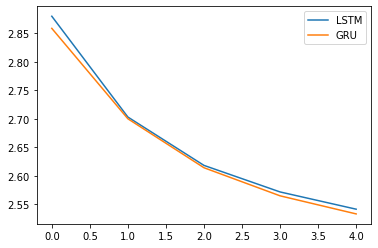

In [ ]:
plt.plot(history.history['val_loss'][:5], label='LSTM')
plt.plot(history_gru.history['val_loss'], label='GRU')
plt.legend()
plt.show()

In [ ]:
rouge1_predicted , rougel_predicted = ({'r': 0.6, 'p': 0.016304347826086956, 'f': 0.03174603123092859},
                                      {'r': 0.4, 'p': 0.010869565217391304, 'f': 0.021164020648918015})

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
target_word_index

{'ankara': 1,
 'bibh': 2,
 'ও': 3,
 'না': 4,
 'থেকে': 5,
 'দুই': 6,
 'হবে': 7,
 'করে': 8,
 'নিয়ে': 9,
 'এক': 10,
 'গ্রেপ্তার': 11,
 'পর': 12,
 'নিহত': 13,
 'টাকা': 14,
 'হয়েছে': 15,
 'বিরুদ্ধে': 16,
 'করা': 17,
 'তিন': 18,
 'হাজার': 19,
 'সঙ্গে': 20,
 'উদ্ধার': 21,
 'জন্য': 22,
 'জনের': 23,
 'করতে': 24,
 'আজ': 25,
 'শুরু': 26,
 'এ': 27,
 'আহত': 28,
 'লাখ': 29,
 'জন': 30,
 'মামলা': 31,
 'মৃত্যু': 32,
 'দাবি': 33,
 'মধ্যে': 34,
 'নেই': 35,
 'হচ্ছে': 36,
 'দিন': 37,
 'হত্যা': 38,
 'পুলিশ': 39,
 'লাশ': 40,
 'বন্ধ': 41,
 'নতুন': 42,
 'আটক': 43,
 '১': 44,
 '১০': 45,
 'কোটি': 46,
 'অভিযোগ': 47,
 'হয়': 48,
 'বছর': 49,
 '২': 50,
 'করোনা': 51,
 'চার': 52,
 'আরও': 53,
 '৩': 54,
 'করার': 55,
 'নয়': 56,
 'দিয়ে': 57,
 '২৪': 58,
 '৫': 59,
 'পাঁচ': 60,
 'দিতে': 61,
 'বিএনপির': 62,
 'হয়ে': 63,
 'কাজ': 64,
 'প্রথম': 65,
 'বাংলাদেশ': 66,
 'পর্যন্ত': 67,
 'নেতা': 68,
 'টাকার': 69,
 'নির্বাচন': 70,
 'বিএনপি': 71,
 'গত': 72,
 'হত্যার': 73,
 'শনাক্ত': 74,
 'ঘণ্টায়': 75,
 'সময়': 76,
 'ঢাকা': 77,
 'হতে': 78,
 

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['ankara']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='bibh'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'bibh'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['ankara']) and i!=target_word_index['bibh']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,100):
  print("Review:",seq2text(x_tr[i]))
  print("Original summary:",seq2summary(y_tr[i]))
  print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
  print("\n")

### Pre-trained Transformers

In [ ]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 34.9 MB/s 
     |████████████████████████████████| 7.6 MB 63.5 MB/s 
     |████████████████████████████████| 182 kB 74.9 MB/s 
     |████████████████████████████████| 1.3 MB 51.6 MB/s 


In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
model_bart = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

In [ ]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
preprocessed.head()

,cleaned_text,cleaned_summary
0,গাজীপুরে ছেলে ‘হত্যার বিচার চাই গিয়ে প্রতিপক্ষ...,সালিস বৈঠককে কেন্দ্র করে আসাদুল ইসলামকে স্থানী...
1,কুষ্টিয়া সদর উপজেলায় শেখ রাসেল কুষ্টিয়াহরিপুর ...,বুধবার সন্ধ্যার পর থেকে দেড় ঘণ্টায় বাঁধের অন্ত...
2,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বল আ...,বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছ...
3,কিশোরগঞ্জের পাকুন্দিয়ায় ব্রহ্মপুত্র নদে নৌকাডু...,নিহত মোবারক হোসেন উপজেলার চরফরাদী ইউনিয়নের চরপ...
4,বঙ্গবন্ধু শেখ মুজিবুর রহমান কাছে থে দেখ তাঁ সব...,বঙ্গবন্ধু শেখ মুজিবুর রহমানকে কাছে থেকে দেখেছে...


In [ ]:
summarize = np.array(preprocessed['cleaned_text'])
summarize[0]

'গাজীপুরে ছেলে ‘হত্যার বিচার চাই গিয়ে প্রতিপক্ষের মারধরে পোশাকশ্রমিক বাবার মৃত্যু হ বলে অভিযোগ পাওয়া গ আজ বুধবার দুপুরে গাজীপুর সিটি করপোরেশনের বাহাদুরপর এলাকায় এ ঘটনা ঘটে নিহত ব্যক্তির নাম আসাদুল ইসলাম ৫২ তিনি গাইবান্ধার গোবিন্দগঞ্জ উপজেলার পাঁচউলিপুর এলাকার মৃত গোলাম উদ্দিনের ছেলেনিহতের পরিবার  পুলিশ সূত্র জানায় আসাদুল ইসলাম গাজীপুর সিটি করপোরেশনের বাহাদুরপুর তুলসীভিটা এলাকার ফিরোজের বাড়ি সপরিবার ভাড়া থাকেন সেখান থে স্থানীয় একটি পোশাক তৈরি কারখানায় চাকরি করতেন ৩ আগস্ট বেলা ১১টার দি তাঁর ছেলে মো নয়ন মিয়া ১২ তুরাগ নদে মাছ ধরার কথা বলে বাড়ি থে ডে আঙ্গুটিয়াচালা এলাকায় নিয়ে যান প্রতিবেশী সেজু ২৫ আনন্দ ২১ বাবলু মিয়া ৪২ শাহীন হোসেনসহ ১৯ কয়েকজন সেখানে নৌকা থে নদে পড়ে নিখোঁজ হয় নয়ন পরে সন্ধ্যায় তার লাশ ও নদ থে উদ্ধার করেন স্থানীয় ব্যক্তিরাএ ঘটনায় নৌকা থে নদে ফেলে দিয়ে নয়ন হত্যা ক হ বলে দাবি করেন আসাদুল ইসলাম বিষয়টি নিয়ে এলাকায় আসাদুলের ঘনিষ্ঠ সুজন মাহমুদ  অভিযুক্তদের আত্মীয় আলমগীর হোসেনের সমর্থকদের মধ্যে বিরোধ সৃষ্টি হয় এ নিয়ে গত সোমবার বিকেলে সালিস ডাকা হয় প্রতিপক্ষের লোকজন উপস্থিত না থাকায় 

In [ ]:
!pip install googletrans==3.1.0a0 gensim==4.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 1.4 MB 57.4 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 65 kB 4.4 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=1b5e713d4ab54df6614190dc4c3572e181af8a9df2ac038e03845cc4e14c2bca
  Stored in directory: /root/.cache/pip/wheels/dd/59/af/8d6c96a719763990f1c548e36b17d9efdfb767f42f7ff39f53
Successfully built googletrans
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from googletrans import Translator
import googletrans

translator = Translator()
result1 = translator.translate(summarize[0], src='bn', dest='en')
print(result1.text)

In Gazipur, it has been alleged that the father of a garment worker was beaten up by his opponent while seeking justice for his son's murder. The incident took place on Wednesday afternoon in Bahadurpar area of ​​Gazipur City Corporation. The deceased's name is Asadul Islam, 52. He is the family of Golam Uddin, the deceased son of Panchulipur area of ​​Gobindganj Upazila of Gaibandhar, according to police sources. The family used to rent Feroze's house in Bahadurpur Tulsivita area of ​​Gazipur City Corporation. From there, he worked in a local garment factory. On August 3, at 11 o'clock, his son Mo Nayan Mia 12 took him home to Angutiachala area, the neighbor Seju 25 Anand 21 Bablu, talking about fishing in the Turag river. Mia 42 Shaheen Hossain and 19 others fell from the boat and disappeared in the river. Later in the evening his body was recovered from the river. A dispute arose between Hussain's supporters and arbitration was called last Monday afternoon as the opponents were not 

In [ ]:
inputs = tokenizer([result1.text], return_tensors = 'pt')

In [ ]:
summary_ids = model_bart.generate(inputs['input_ids'], max_length=500, early_stopping=False)

In [ ]:
summary_ids

tensor([[    2,     0,   133,  1160,   362,   317,    15,   307,  1390,    11,
         10957,   625,   710,  5489,   443,     9, 15119,  1588,   710,   412,
          2824,     4,    20, 10435,    18,   766,    16,   287,   625,   922,
          7503,     6,  3135,     4,    91,    16,     5,   284,     9, 14494,
           424,   121, 16134,   179,     6,     5, 10435,   979,     9,   221,
         10459,   922,  1588,   710,   443,     9, 12227, 13635,   534,  2413,
          2028,  3494,   267,  3105,  1222,  4882,     9, 10160, 47083,  4759,
             4,   374,   830,   155,     6,    23,   365,  1021,   108, 17036,
             6,    39,   979,  3713,   234, 10790, 19156,   316,   362,   123,
           184,     7,  7413, 18078,  1488,  2331,   443,     6,     5,  8523,
          1608,  7488,   564,   660,   463,   733,  6753,  6487,     6,     8,
           753,   643,  1064,    31,     5,  4293,     8,  9939,    11,     5,
          7422,  1073,  4908,     4,  6811,    11,  

In [ ]:
final_summary = [tokenizer.decode(g, skip_special_tokens=True) for g in summary_ids]
result_summary = translator.translate(final_summary[0], src='en', dest='bn')
result_summary.text

'বুধবার বিকেলে গাজীপুর সিটি করপোরেশনের বাহাদুরপাড় এলাকায় এ ঘটনা ঘটে। নিহতের নাম আসাদুল ইসলাম (৫২)।তিনি গাইবান্ধার গোবিন্দগঞ্জ উপজেলার পাঁচুলিপুর এলাকার মৃত ছেলে গোলাম উদ্দিনের পরিবারের। ৩ আগস্ট বেলা ১১টার দিকে তার ছেলে মো নয়ন মিয়া (১২) তাকে আঙ্গুটিয়াচালা এলাকায় বাড়িতে নিয়ে যায়, প্রতিবেশী সেজু ২৫ আনন্দ ২১ বাবলুসহ ১৯ জন নৌকা থেকে পড়ে তুরাগ নদীতে নিখোঁজ হয়। পরে সন্ধ্যায় নদী থেকে তার লাশ উদ্ধার করা হয়। হোসেনের সমর্থকদের মধ্যে বিরোধ দেখা দেয় এবং প্রতিপক্ষ উপস্থিত না থাকায় গত সোমবার বিকেলে সালিশ ডাকা হয়। বৈঠকটি হয়নি। বুধবার বেলা ৩টায় পরবর্তী সালিশি বৈঠকের দিন ধার্য করা হয়।'

In [ ]:
summarize[0]

'গাজীপুরে ছেলে ‘হত্যার বিচার চাই গিয়ে প্রতিপক্ষের মারধরে পোশাকশ্রমিক বাবার মৃত্যু হ বলে অভিযোগ পাওয়া গ আজ বুধবার দুপুরে গাজীপুর সিটি করপোরেশনের বাহাদুরপর এলাকায় এ ঘটনা ঘটে নিহত ব্যক্তির নাম আসাদুল ইসলাম ৫২ তিনি গাইবান্ধার গোবিন্দগঞ্জ উপজেলার পাঁচউলিপুর এলাকার মৃত গোলাম উদ্দিনের ছেলেনিহতের পরিবার  পুলিশ সূত্র জানায় আসাদুল ইসলাম গাজীপুর সিটি করপোরেশনের বাহাদুরপুর তুলসীভিটা এলাকার ফিরোজের বাড়ি সপরিবার ভাড়া থাকেন সেখান থে স্থানীয় একটি পোশাক তৈরি কারখানায় চাকরি করতেন ৩ আগস্ট বেলা ১১টার দি তাঁর ছেলে মো নয়ন মিয়া ১২ তুরাগ নদে মাছ ধরার কথা বলে বাড়ি থে ডে আঙ্গুটিয়াচালা এলাকায় নিয়ে যান প্রতিবেশী সেজু ২৫ আনন্দ ২১ বাবলু মিয়া ৪২ শাহীন হোসেনসহ ১৯ কয়েকজন সেখানে নৌকা থে নদে পড়ে নিখোঁজ হয় নয়ন পরে সন্ধ্যায় তার লাশ ও নদ থে উদ্ধার করেন স্থানীয় ব্যক্তিরাএ ঘটনায় নৌকা থে নদে ফেলে দিয়ে নয়ন হত্যা ক হ বলে দাবি করেন আসাদুল ইসলাম বিষয়টি নিয়ে এলাকায় আসাদুলের ঘনিষ্ঠ সুজন মাহমুদ  অভিযুক্তদের আত্মীয় আলমগীর হোসেনের সমর্থকদের মধ্যে বিরোধ সৃষ্টি হয় এ নিয়ে গত সোমবার বিকেলে সালিস ডাকা হয় প্রতিপক্ষের লোকজন উপস্থিত না থাকায় 

In [ ]:
print(f"Rouge-1 precision: {rouge1_predicted['p']} and f1: {rouge1_predicted['f']}")
print(f"Rouge-l precision: {rougel_predicted['p']} and f1: {rougel_predicted['f']}")

In [ ]:
!pip install Rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Rouge Score Measure

In [ ]:
from rouge import Rouge
rouge = Rouge()
rouge_1_bart = rouge.get_scores(result_summary.text, summarize[0])[0]['rouge-1']
rouge_l_bart = rouge.get_scores(result_summary.text, summarize[0])[0]['rouge-l']
print(f"Rouge-1 precision: {rouge_1_bart['p']} and f1: {rouge_1_bart['f']}")
print(f"Rouge-l precision: {rouge_l_bart['p']} and f1: {rouge_l_bart['f']}")

Rouge-1 precision: 0.5952380952380952 and f1: 0.32894736442174516
Rouge-l precision: 0.5476190476190477 and f1: 0.302631574948061


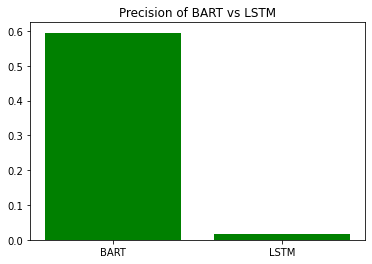

In [ ]:
import matplotlib.pyplot as plt

plt.bar( ['BART', "LSTM"],
        [rouge_1_bart['p'], rouge1_predicted['p']], color ='green',
        width = 0.8)
plt.title("Precision of BART vs LSTM")
plt.show();

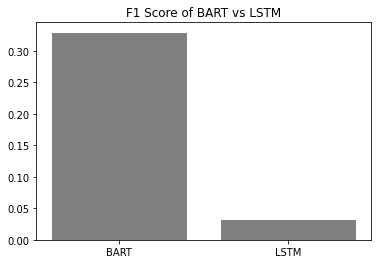

In [ ]:
import matplotlib.pyplot as plt

plt.bar( ['BART', "LSTM"],
        [rouge_1_bart['f'], rouge1_predicted['f']], color ='gray',
        width = 0.8)
plt.title("F1 Score of BART vs LSTM")
plt.show();

### Pre-trained Pegasus Model  

In [ ]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 26.1 MB/s 
     |████████████████████████████████| 182 kB 74.3 MB/s 
     |████████████████████████████████| 7.6 MB 60.8 MB/s 
     |████████████████████████████████| 1.3 MB 60.0 MB/s 


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

In [ ]:
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")

Downloading:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

In [ ]:
model_pegasus= PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

In [ ]:
bibh = Translator()
result1 = bibh.translate(summarize[0], src='bn', dest='en')
tokens = tokenizer(result1.text, truncation=True, padding='longest', return_tensors='pt')

In [ ]:
result1.text

"In Gazipur, it has been alleged that the father of a garment worker was beaten up by his opponent while seeking justice for his son's murder. The incident took place on Wednesday afternoon in Bahadurpar area of \u200b\u200bGazipur City Corporation. The deceased's name is Asadul Islam, 52. He is the family of Golam Uddin, the deceased son of Panchulipur area of \u200b\u200bGobindganj Upazila of Gaibandhar, according to police sources. The family used to rent Feroze's house in Bahadurpur Tulsivita area of \u200b\u200bGazipur City Corporation. From there, he worked in a local garment factory. On August 3, at 11 o'clock, his son Mo Nayan Mia 12 took him home to Angutiachala area, the neighbor Seju 25 Anand 21 Bablu, talking about fishing in the Turag river. Mia 42 Shaheen Hossain and 19 others fell from the boat and disappeared in the river. Later in the evening his body was recovered from the river. A dispute arose between Hussain's supporters and arbitration was called last Monday after

In [ ]:
tokens

{'input_ids': tensor([[  222, 84732,  8753,   108,   126,   148,   174,  6854,   120,   109,
          1802,   113,   114, 13759,  5631,   140, 10222,   164,   141,   169,
          8379,   277,  2486,  3736,   118,   169,  1601,   131,   116,  5939,
           107,   139,  4077,   635,   295,   124,  1900,  2485,   115, 89330,
          9885,   345,   113, 84732,  8753,   672,  4356,   107,   139, 12620,
           131,   116,   442,   117,   398,   304, 34703,  9348,   108,  7104,
           107,   285,   117,   109,   328,   113,  1859, 13207,   475,   252,
         14121,   108,   109, 12620,  1601,   113,  5981,  3186, 17258,  8753,
           345,   113,  1859, 52935, 53313,  2768, 24231,  3003,   113, 36000,
          9570, 10176,   108,   992,   112,  1564,  2139,   107,   139,   328,
           263,   112,  2813, 16822,  8675,   326,   131,   116,   480,   115,
         89330,  8753, 81056, 27237,   345,   113, 84732,  8753,   672,  4356,
           107,  1078,   186,   108,  

In [ ]:
summary = model_pegasus.generate(**tokens)
summary

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


tensor([[    0,  3385,   127,  9093,   228,  1910,  8843,   113,  3459,   115,
         84732,  8753,   111, 36000,  9570, 10176,   107,     1]])

In [ ]:
summary = tokenizer.decode(summary[0])
final_summary = bibh.translate(summary, src='en', dest='bn').text
print(f"Description: {summarize[0]}")
print(f"Summary: {final_summary}")

Description: গাজীপুরে ছেলে ‘হত্যার বিচার চাই গিয়ে প্রতিপক্ষের মারধরে পোশাকশ্রমিক বাবার মৃত্যু হ বলে অভিযোগ পাওয়া গ আজ বুধবার দুপুরে গাজীপুর সিটি করপোরেশনের বাহাদুরপর এলাকায় এ ঘটনা ঘটে নিহত ব্যক্তির নাম আসাদুল ইসলাম ৫২ তিনি গাইবান্ধার গোবিন্দগঞ্জ উপজেলার পাঁচউলিপুর এলাকার মৃত গোলাম উদ্দিনের ছেলেনিহতের পরিবার  পুলিশ সূত্র জানায় আসাদুল ইসলাম গাজীপুর সিটি করপোরেশনের বাহাদুরপুর তুলসীভিটা এলাকার ফিরোজের বাড়ি সপরিবার ভাড়া থাকেন সেখান থে স্থানীয় একটি পোশাক তৈরি কারখানায় চাকরি করতেন ৩ আগস্ট বেলা ১১টার দি তাঁর ছেলে মো নয়ন মিয়া ১২ তুরাগ নদে মাছ ধরার কথা বলে বাড়ি থে ডে আঙ্গুটিয়াচালা এলাকায় নিয়ে যান প্রতিবেশী সেজু ২৫ আনন্দ ২১ বাবলু মিয়া ৪২ শাহীন হোসেনসহ ১৯ কয়েকজন সেখানে নৌকা থে নদে পড়ে নিখোঁজ হয় নয়ন পরে সন্ধ্যায় তার লাশ ও নদ থে উদ্ধার করেন স্থানীয় ব্যক্তিরাএ ঘটনায় নৌকা থে নদে ফেলে দিয়ে নয়ন হত্যা ক হ বলে দাবি করেন আসাদুল ইসলাম বিষয়টি নিয়ে এলাকায় আসাদুলের ঘনিষ্ঠ সুজন মাহমুদ  অভিযুক্তদের আত্মীয় আলমগীর হোসেনের সমর্থকদের মধ্যে বিরোধ সৃষ্টি হয় এ নিয়ে গত সোমবার বিকেলে সালিস ডাকা হয় প্রতিপক্ষের লোকজন উপস্থ

In [ ]:
summary = tokenizer.decode(summary[0])
final_summary = bibh.translate(summary, src='en', dest='bn').text
final_summary

'জাতীয় সংসদের একজন সংসদ সদস্য ও তার পরিবারের বিরুদ্ধে দুটি মানহানির মামলা করেছে চট্টগ্রামভিত্তিক একটি মিডিয়া গ্রুপ।'

In [ ]:
summarize[11]

'চট্টগ্রামে বসুন্ধ গ্রুপের চেয়ারম্যান আহমেদ আকবর সোবহান ওরফে শাহ আলম ও গ্রুপের মালিকানাধীন ইস্ট ওয়েস্ট মিডিয়া লিমিটেডের ব্যবস্থাপনা পরিচালক  তাঁর ছেলে সায়েম সোবহানসহ ১১ জনের বিরুদ্ধে সংবাদ প্রকাশ করে মানহানির অভিযোগে মামলা হ ৫০০ কোটি টাকা ক্ষতিপূরণ চেয়ে আজ বুধবার পটিয়ার যুগ্ম জেলা  দায় জজ আদালতের বিচারক মোহাম্মদ আবদুল কাদেরের আদাল মামলাটি করেন জাতীয় সংসদের হুইপ  পটিয়ার আওয়ামী লীগদলীয় সাংসদ সামশুল হক চৌধুরীবাদীর আইনজীবী দীপক কুমার শীল প্রথম আলো বলেন আদালত মামলাটি গ্রহণ করে বিবাদীদের বিরুদ্ধে সমন জারির আদেশ দিয় আগামী ২৩ সেপ্টেম্বর পরবর্তী দিন ধার্য রয়েছেমামলায় অন্য বিবাদী হলেন দৈনিক বাংলাদেশ প্রতিদিন–এর সম্পাদক নঈম নিজাম কালের কণ্ঠ–এর সম্পাদক ইমদাদুল হক মিলন ইংরেজি দৈনিক ডেইলি সান–এর সম্পাদক এনামুল হক চৌধুরী বাংলাদেশ প্রতিদিন–এর ঢাকার প্রতিবেদক সাইদুর রহমান রিমন চট্টগ্রামের প্রতিনিধি রিয়াজ হায়দার চৌধুরী  মোহাম্মদ সেলিম কালের কণ্ঠ–এর চট্টগ্রাম প্রতিনিধি এস এম রানা নিউজ২৪ চ্যানেলের সম্পাদক এবং বাংলা নিউজ২৪ ডটকম অনলাইন নিউজ পোর্টালের সম্পাদকমামলা করার পর বাদীর আইনজীবী দীপক কুমার শীল আদালত প

In [ ]:
!pip install Rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge

In [ ]:
rouge = Rouge()
rouge_1_pegasus = rouge.get_scores(final_summary, summarize[11])[0]['rouge-1']
rouge_l_pegasus = rouge.get_scores(final_summary, summarize[11])[0]['rouge-l']

In [ ]:
rouge_1_pegasus, rouge_l_pegasus

({'r': 0.03389830508474576,
  'p': 0.35294117647058826,
  'f': 0.06185566850409187},
 {'r': 0.022598870056497175,
  'p': 0.23529411764705882,
  'f': 0.04123711180306096})

In [ ]:
rouge = Rouge()
rouge_1_pegasus1 = rouge.get_scores(final_summary, summarize[0])[0]['rouge-1']
rouge_l_pegasus1= rouge.get_scores(final_summary, summarize[0])[0]['rouge-l']
rouge_1_pegasus, rouge_l_pegasus

({'r': 0.03389830508474576,
  'p': 0.35294117647058826,
  'f': 0.06185566850409187},
 {'r': 0.022598870056497175,
  'p': 0.23529411764705882,
  'f': 0.04123711180306096})